In [1]:
import numpy as np 
import pandas as pd 

In [2]:
att = '/kaggle/input/event-recommendation-engine-challenge/event_attendees.csv.gz'
events="/kaggle/input/event-recommendation-engine-challenge/events.csv.gz"
friends='/kaggle/input/event-recommendation-engine-challenge/user_friends.csv.gz'
test=pd.read_csv('/kaggle/input/event-recommendation-engine-challenge/test.csv')
train=pd.read_csv('/kaggle/input/event-recommendation-engine-challenge/train.csv')
user=pd.read_csv('/kaggle/input/event-recommendation-engine-challenge/users.csv')
# Read the gzipped CSV file into a DataFrame
attendee = pd.read_csv(att, compression='gzip')
event= pd.read_csv(events, compression='gzip')
friend= pd.read_csv(friends, compression='gzip')


In [3]:
attendee.head()

,event,yes,maybe,invited,no
0,1159822043,1975964455 252302513 4226086795 3805886383 142...,2733420590 517546982 1350834692 532087573 5831...,1723091036 3795873583 4109144917 3560622906 31...,3575574655 1077296663
1,686467261,2394228942 2686116898 1056558062 3792942231 41...,1498184352 645689144 3770076778 331335845 4239...,1788073374 733302094 1830571649 676508092 7081...,NaN
2,1186208412,NaN,3320380166 3810793697,1379121209 440668682,1728988561 2950720854
3,2621578336,NaN,NaN,NaN,NaN
4,855842686,2406118796 3550897984 294255260 1125817077 109...,2671721559 1761448345 2356975806 2666669465 10...,1518670705 880919237 2326414227 2673818347 332...,3500235232


In [4]:
attendee.rename(columns={'event': 'event_id'}, inplace=True)
attendee.head()

,event_id,yes,maybe,invited,no
0,1159822043,1975964455 252302513 4226086795 3805886383 142...,2733420590 517546982 1350834692 532087573 5831...,1723091036 3795873583 4109144917 3560622906 31...,3575574655 1077296663
1,686467261,2394228942 2686116898 1056558062 3792942231 41...,1498184352 645689144 3770076778 331335845 4239...,1788073374 733302094 1830571649 676508092 7081...,NaN
2,1186208412,NaN,3320380166 3810793697,1379121209 440668682,1728988561 2950720854
3,2621578336,NaN,NaN,NaN,NaN
4,855842686,2406118796 3550897984 294255260 1125817077 109...,2671721559 1761448345 2356975806 2666669465 10...,1518670705 880919237 2326414227 2673818347 332...,3500235232


In [5]:
event.head()

,event_id,user_id,start_time,city,state,zip,country,lat,lng,c_1,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
0,684921758,3647864012,2012-10-31T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0,1,0,0,0,0,0,0,0,9
1,244999119,3476440521,2012-11-03T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0,0,0,0,0,0,0,0,0,7
2,3928440935,517514445,2012-11-05T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,12
3,2582345152,781585781,2012-10-30T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,8
4,1051165850,1016098580,2012-09-27T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,9


In [6]:
test.head()

,user,event,invited,timestamp
0,1776192,2877501688,0,2012-11-30 11:39:01.230000+00:00
1,1776192,3025444328,0,2012-11-30 11:39:01.230000+00:00
2,1776192,4078218285,0,2012-11-30 11:39:01.230000+00:00
3,1776192,1024025121,0,2012-11-30 11:39:01.230000+00:00
4,1776192,2972428928,0,2012-11-30 11:39:21.985000+00:00


In [7]:
train.head()

,user,event,invited,timestamp,interested,not_interested
0,3044012,1918771225,0,2012-10-02 15:53:05.754000+00:00,0,0
1,3044012,1502284248,0,2012-10-02 15:53:05.754000+00:00,0,0
2,3044012,2529072432,0,2012-10-02 15:53:05.754000+00:00,1,0
3,3044012,3072478280,0,2012-10-02 15:53:05.754000+00:00,0,0
4,3044012,1390707377,0,2012-10-02 15:53:05.754000+00:00,0,0


In [8]:
train.drop(columns=["timestamp"],inplace=True)
train

,user,event,invited,interested,not_interested
0,3044012,1918771225,0,0,0
1,3044012,1502284248,0,0,0
2,3044012,2529072432,0,1,0
3,3044012,3072478280,0,0,0
4,3044012,1390707377,0,0,0
...,...,...,...,...,...
15393,4293103086,2750873665,0,0,0
15394,4293103086,4084655790,0,0,0
15395,4293103086,598708806,0,0,0
15396,4293103086,604179853,0,0,0


In [9]:
friend.head()

,user,friends
0,3197468391,1346449342 3873244116 4226080662 1222907620 54...
1,3537982273,1491560444 395798035 2036380346 899375619 3534...
2,823183725,1484954627 1950387873 1652977611 4185960823 42...
3,1872223848,83361640 723814682 557944478 1724049724 253059...
4,3429017717,4253303705 2130310957 1838389374 3928735761 71...


In [10]:
user.head()

,user_id,locale,birthyear,gender,joinedAt,location,timezone
0,3197468391,id_ID,1993,male,2012-10-02T06:40:55.524Z,Medan Indonesia,480.0
1,3537982273,id_ID,1992,male,2012-09-29T18:03:12.111Z,Medan Indonesia,420.0
2,823183725,en_US,1975,male,2012-10-06T03:14:07.149Z,Stratford Ontario,-240.0
3,1872223848,en_US,1991,female,2012-11-04T08:59:43.783Z,Tehran Iran,210.0
4,3429017717,id_ID,1995,female,2012-09-10T16:06:53.132Z,NaN,420.0


In [11]:
attendee.isnull().sum()

event_id       0
yes         1984
maybe       3167
invited     1822
no          6659
dtype: int64

In [12]:
attendee.shape

(24144, 5)

In [13]:
attendee.dropna(inplace=True)
attendee.reset_index(drop=True, inplace=True)

In [14]:
attendee.shape

(16789, 5)

In [15]:
attendee.duplicated().sum()

0

In [16]:
event.isnull().sum()

event_id            0
user_id             0
start_time          0
city          1557125
state         1889723
               ...   
c_97                0
c_98                0
c_99                0
c_100               0
c_other             0
Length: 110, dtype: int64

In [17]:
event.duplicated().sum()

0

In [18]:
event.dropna(inplace=True)
event.reset_index(drop=True, inplace=True)

In [19]:
test.isnull().sum()

user         0
event        0
invited      0
timestamp    0
dtype: int64

In [20]:
test.duplicated().sum()

0

In [21]:
train.isnull().sum()

user              0
event             0
invited           0
interested        0
not_interested    0
dtype: int64

In [22]:
friend.isnull().sum()

user         0
friends    139
dtype: int64

In [23]:
friend.duplicated().sum()

0

In [24]:
user.isnull().sum()

user_id         0
locale          0
birthyear    1492
gender        109
joinedAt       58
location     5465
timezone      436
dtype: int64

In [25]:
user.duplicated().sum()

0

In [26]:
user.dropna(inplace=True)
user.reset_index(drop=True, inplace=True)

In [27]:
event.columns

Index(['event_id', 'user_id', 'start_time', 'city', 'state', 'zip', 'country',
       'lat', 'lng', 'c_1',
       ...
       'c_92', 'c_93', 'c_94', 'c_95', 'c_96', 'c_97', 'c_98', 'c_99', 'c_100',
       'c_other'],
      dtype='object', length=110)

In [28]:
event=event[['event_id','user_id', 'city', 'state', 'zip', 'country']]
event.head()

,event_id,user_id,city,state,zip,country
0,1924180022,1571299514,Palo Alto,CA,94304,United States
1,2654661184,1785633648,Palo Alto,CA,94304,United States
2,766157199,415464198,New York,NY,0212,United States
3,197942693,4272720232,Menlo Park,CA,94025,United States
4,3578194644,571508037,Mobile,AL,36602,United States


In [29]:
event=event.merge(user,on="user_id")

In [30]:
event.drop(columns=["joinedAt"], inplace=True)

In [31]:
event.head()

,event_id,user_id,city,state,zip,country,locale,birthyear,gender,location,timezone
0,3715070860,4072475571,Scottsdale,AZ,85251,United States,en_US,1986,male,Tempe Arizona,-420.0
1,473058149,4072475571,Scottsdale,AZ,85251,United States,en_US,1986,male,Tempe Arizona,-420.0
2,2470912453,4072475571,Scottsdale,AZ,85251,United States,en_US,1986,male,Tempe Arizona,-420.0
3,726785080,4072475571,Scottsdale,AZ,85251,United States,en_US,1986,male,Tempe Arizona,-420.0
4,2617055799,4072475571,Scottsdale,AZ,85251,United States,en_US,1986,male,Tempe Arizona,-420.0


Exploratory Data Analysis (EDA):

In [32]:
train.event.unique()

array([1918771225, 1502284248, 2529072432, ...,  598708806,  604179853,
       2351245308])

Counting the number of user interested in each event.

In [33]:
num = train[train['interested'] == 1].groupby('event').size().reset_index(name='num_interested')
num.sample(10)

,event,num_interested
2237,3636357325,1
1377,2202597115,1
1663,2645301517,2
262,472751320,1
902,1464985006,1
698,1159109322,1
1359,2173367744,1
799,1332759137,10
824,1356764145,1
1476,2354753475,1


In [34]:
inv = train[train['invited'] == 1].groupby('event').size().reset_index(name='num_invited')
inv

,event,num_invited
0,1174034,1
1,4338728,1
2,4612722,1
3,8259670,1
4,17054803,1
...,...,...
585,4269276292,1
586,4271137008,1
587,4273169880,1
588,4281845603,1


In [35]:
df=num.merge(inv,on='event')
df

,event,num_interested,num_invited
0,38825896,1,1
1,55735397,1,1
2,73460149,1,1
3,96208546,1,1
4,102460414,1,1
...,...,...,...
153,4227274972,1,1
154,4244463632,5,1
155,4258442948,1,1
156,4259189014,2,2


Calculating mean for 'interested' and 'invited' columns for each event.

In [36]:
mean = train.groupby('event')[['interested', 'invited']].mean().reset_index()
mean

,event,interested,invited
0,104070,1.0,0.0
1,1174034,0.0,1.0
2,1642998,1.0,0.0
3,1680138,0.0,0.0
4,1921275,0.5,0.0
...,...,...,...
8841,4290732626,0.0,1.0
8842,4293596113,0.0,0.0
8843,4294096869,0.0,0.0
8844,4294101061,0.0,0.0


Calculating median for 'interested' and 'invited' columns for each event.

In [37]:
median = train.groupby('event')[['interested','invited']].median().reset_index()
median

,event,interested,invited
0,104070,1.0,0.0
1,1174034,0.0,1.0
2,1642998,1.0,0.0
3,1680138,0.0,0.0
4,1921275,0.5,0.0
...,...,...,...
8841,4290732626,0.0,1.0
8842,4293596113,0.0,0.0
8843,4294096869,0.0,0.0
8844,4294101061,0.0,0.0


In [38]:
df=df.merge(mean,on='event')
df

,event,num_interested,num_invited,interested,invited
0,38825896,1,1,1.000000,1.000000
1,55735397,1,1,1.000000,1.000000
2,73460149,1,1,0.500000,0.500000
3,96208546,1,1,1.000000,1.000000
4,102460414,1,1,1.000000,1.000000
...,...,...,...,...,...
153,4227274972,1,1,1.000000,1.000000
154,4244463632,5,1,0.555556,0.111111
155,4258442948,1,1,0.166667,0.166667
156,4259189014,2,2,0.333333,0.333333


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns 

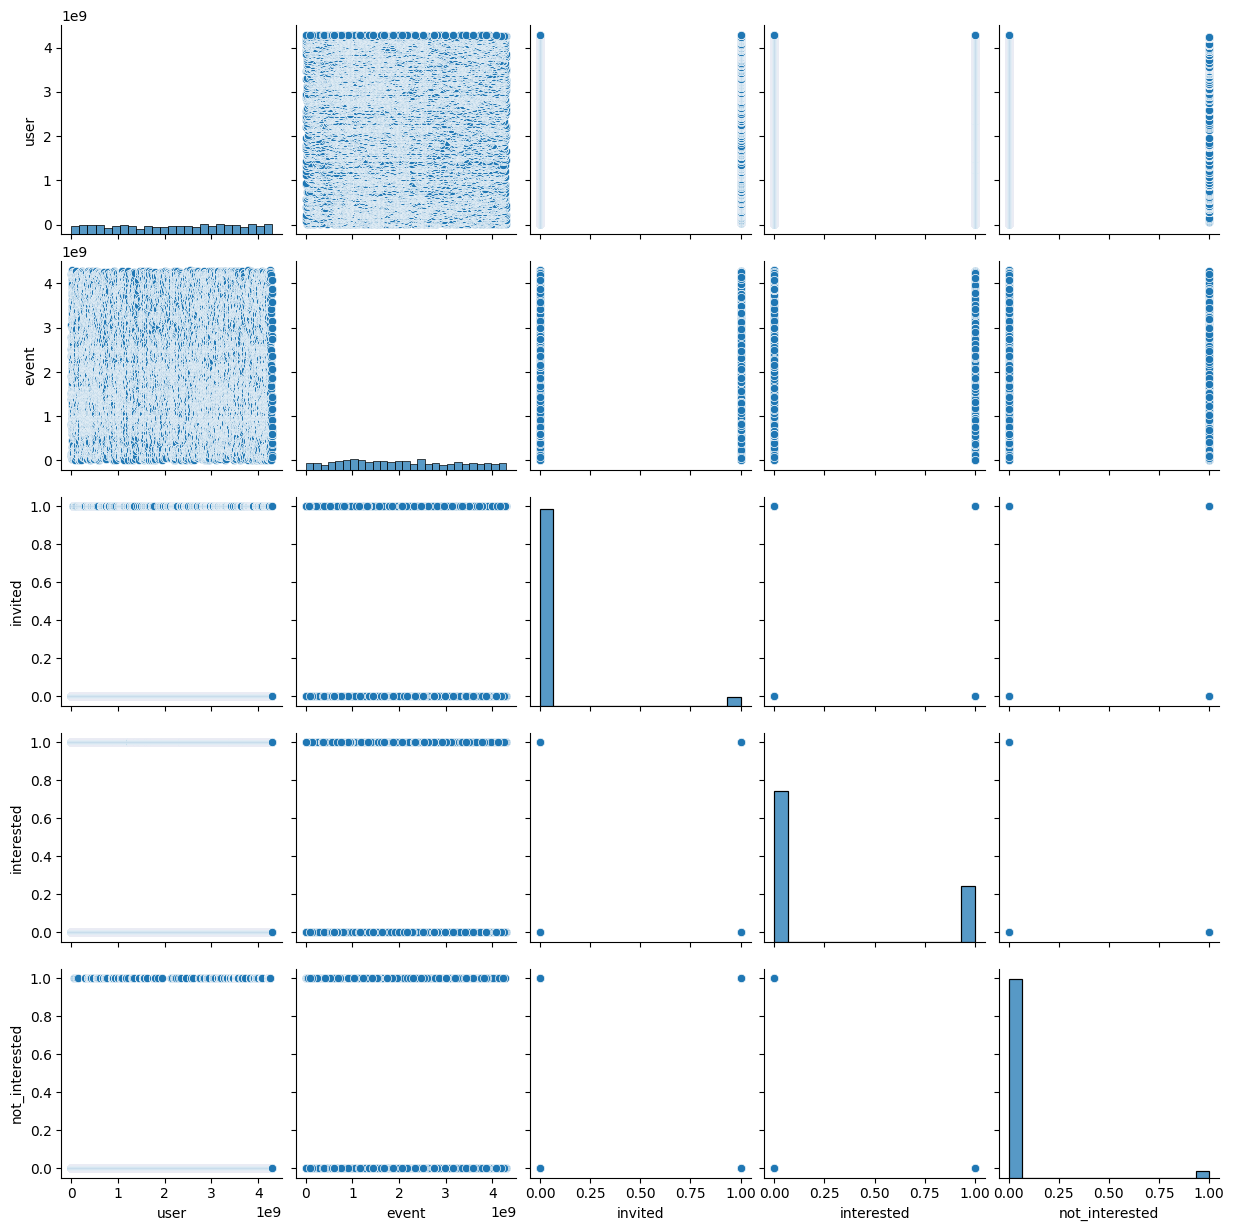

In [40]:
sns.pairplot(train)
plt.show()

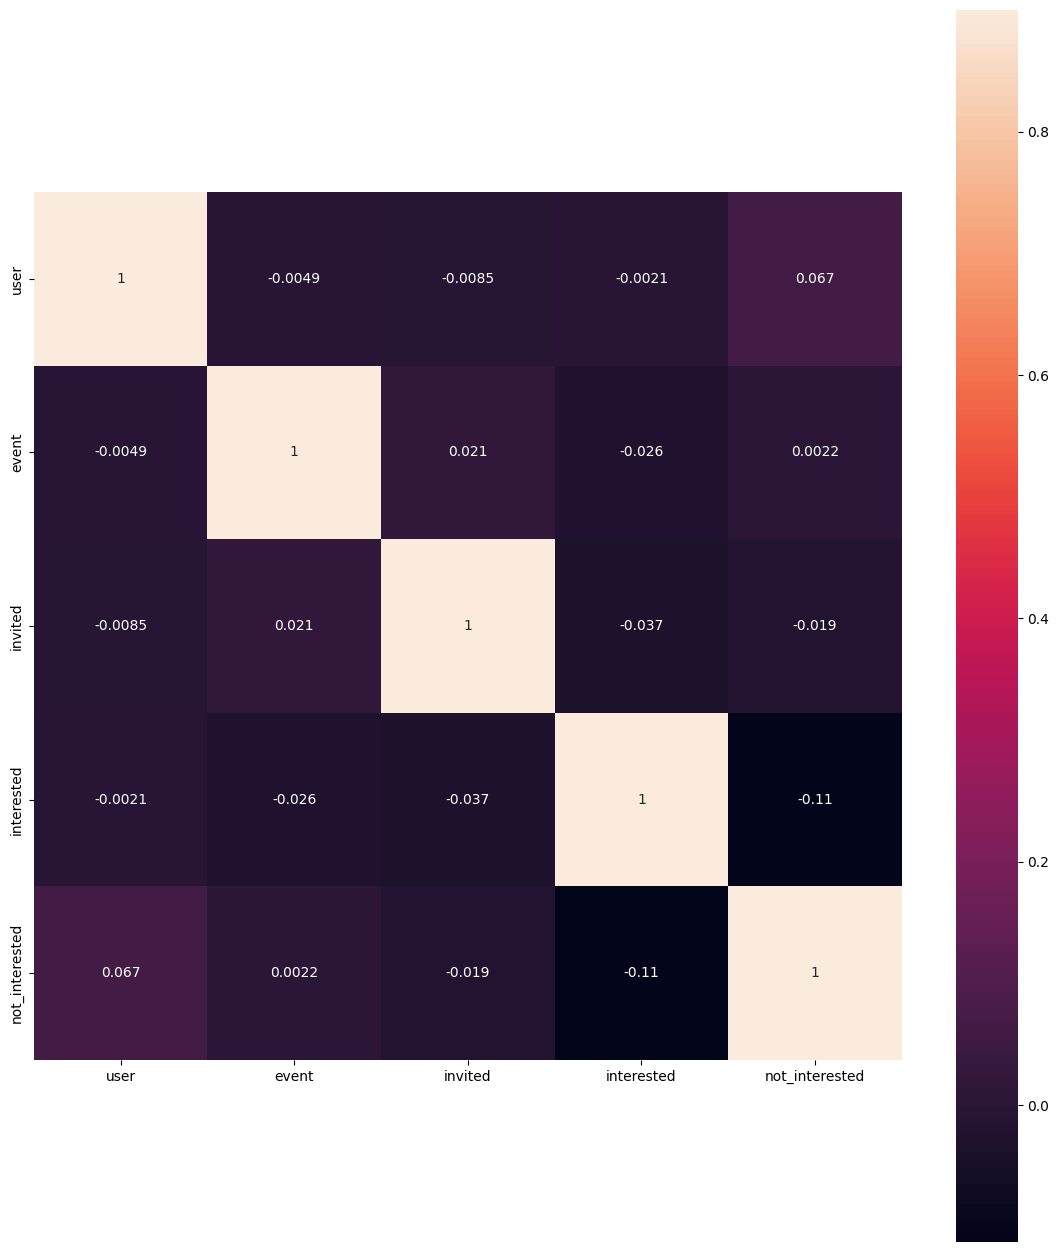

In [41]:
cor = train.corr()
fig= plt.figure(figsize=(14,16))
sns.heatmap(cor , annot = True , vmax=.9 , square = True)
plt.show()


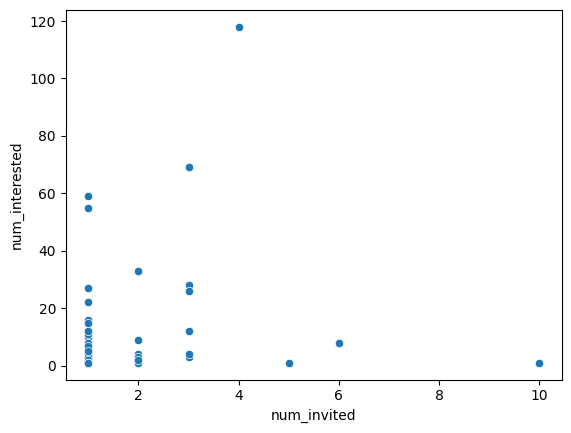

In [42]:
sns.scatterplot(data=df, x='num_invited', y='num_interested')
plt.show()

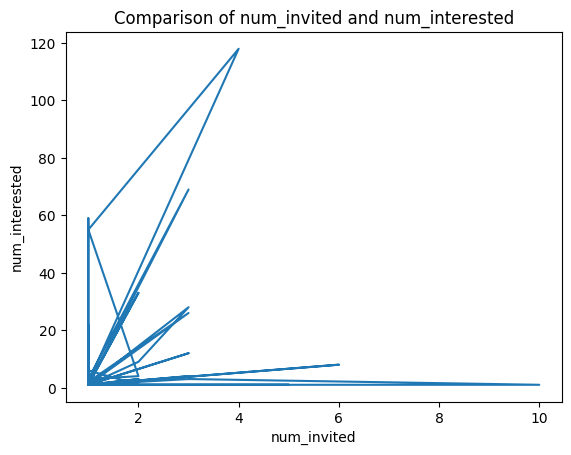

In [43]:
plt.plot(df['num_invited'], df['num_interested'])
plt.xlabel('num_invited')
plt.ylabel('num_interested')
plt.title('Comparison of num_invited and num_interested')
plt.show()

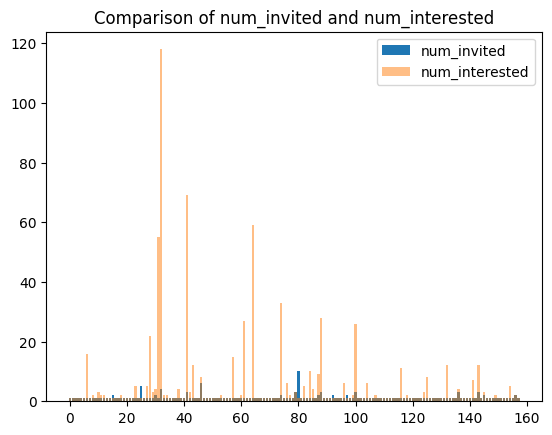

In [44]:
plt.bar(df.index, df['num_invited'], label='num_invited')
plt.bar(df.index, df['num_interested'], label='num_interested', alpha=0.5)  # Using alpha to make bars semi-transparent
plt.title('Comparison of num_invited and num_interested')
plt.legend()
plt.show()

Collaborative filtering.

In [45]:
event

,event_id,user_id,city,state,zip,country,locale,birthyear,gender,location,timezone
0,3715070860,4072475571,Scottsdale,AZ,85251,United States,en_US,1986,male,Tempe Arizona,-420.0
1,473058149,4072475571,Scottsdale,AZ,85251,United States,en_US,1986,male,Tempe Arizona,-420.0
2,2470912453,4072475571,Scottsdale,AZ,85251,United States,en_US,1986,male,Tempe Arizona,-420.0
3,726785080,4072475571,Scottsdale,AZ,85251,United States,en_US,1986,male,Tempe Arizona,-420.0
4,2617055799,4072475571,Scottsdale,AZ,85251,United States,en_US,1986,male,Tempe Arizona,-420.0
...,...,...,...,...,...,...,...,...,...,...,...
96,3134026972,1084194943,Carson,CA,90746,United States,en_US,1983,male,Irvine California,-480.0
97,913651567,3871199330,Toronto,ON,M6J 1J3,Canada,en_GB,1984,male,Toronto ON,-300.0
98,2484857469,2824605516,Buena Park,CA,92804,United States,en_US,1993,male,Fullerton California,-480.0
99,4078462259,2549026279,Toronto,ON,M5A 3Y5,Canada,en_US,1976,male,Toronto Ontario,-240.0


In [46]:
event.rename(columns={"event_id":'event'},inplace=True)

In [47]:
user

,user_id,locale,birthyear,gender,joinedAt,location,timezone
0,3197468391,id_ID,1993,male,2012-10-02T06:40:55.524Z,Medan Indonesia,480.0
1,3537982273,id_ID,1992,male,2012-09-29T18:03:12.111Z,Medan Indonesia,420.0
2,823183725,en_US,1975,male,2012-10-06T03:14:07.149Z,Stratford Ontario,-240.0
3,1872223848,en_US,1991,female,2012-11-04T08:59:43.783Z,Tehran Iran,210.0
4,627175141,ka_GE,1973,female,2012-11-01T09:59:17.590Z,Tbilisi Georgia,240.0
...,...,...,...,...,...,...,...
32214,3890944219,id_ID,1993,female,2012-11-04T07:18:39.354Z,Kebumen Jawa Tengah Indonesia,420.0
32215,446388078,id_ID,1997,male,2012-10-25T22:43:19.834Z,Medan Indonesia,420.0
32216,2548659919,id_ID,1995,male,2012-10-28T07:23:08.383Z,Jogjakarta Indonesia,420.0
32217,723239978,en_US,1989,male,2012-10-30T00:55:34.639Z,Yogyakarta,420.0


In [48]:
user.rename(columns={"user_id":"user"},inplace=True)
user

,user,locale,birthyear,gender,joinedAt,location,timezone
0,3197468391,id_ID,1993,male,2012-10-02T06:40:55.524Z,Medan Indonesia,480.0
1,3537982273,id_ID,1992,male,2012-09-29T18:03:12.111Z,Medan Indonesia,420.0
2,823183725,en_US,1975,male,2012-10-06T03:14:07.149Z,Stratford Ontario,-240.0
3,1872223848,en_US,1991,female,2012-11-04T08:59:43.783Z,Tehran Iran,210.0
4,627175141,ka_GE,1973,female,2012-11-01T09:59:17.590Z,Tbilisi Georgia,240.0
...,...,...,...,...,...,...,...
32214,3890944219,id_ID,1993,female,2012-11-04T07:18:39.354Z,Kebumen Jawa Tengah Indonesia,420.0
32215,446388078,id_ID,1997,male,2012-10-25T22:43:19.834Z,Medan Indonesia,420.0
32216,2548659919,id_ID,1995,male,2012-10-28T07:23:08.383Z,Jogjakarta Indonesia,420.0
32217,723239978,en_US,1989,male,2012-10-30T00:55:34.639Z,Yogyakarta,420.0


In [49]:
train

,user,event,invited,interested,not_interested
0,3044012,1918771225,0,0,0
1,3044012,1502284248,0,0,0
2,3044012,2529072432,0,1,0
3,3044012,3072478280,0,0,0
4,3044012,1390707377,0,0,0
...,...,...,...,...,...
15393,4293103086,2750873665,0,0,0
15394,4293103086,4084655790,0,0,0
15395,4293103086,598708806,0,0,0
15396,4293103086,604179853,0,0,0


In [50]:
data=user.merge(train,on="user")
data

,user,locale,birthyear,gender,joinedAt,location,timezone,event,invited,interested,not_interested
0,4101519751,id_ID,1994,male,2012-11-05T20:30:18.234Z,Yogyakarta,420.0,427097190,0,1,0
1,4101519751,id_ID,1994,male,2012-11-05T20:30:18.234Z,Yogyakarta,420.0,2114066448,0,0,0
2,4101519751,id_ID,1994,male,2012-11-05T20:30:18.234Z,Yogyakarta,420.0,688225431,0,0,0
3,4101519751,id_ID,1994,male,2012-11-05T20:30:18.234Z,Yogyakarta,420.0,2803416473,0,1,0
4,4101519751,id_ID,1994,male,2012-11-05T20:30:18.234Z,Yogyakarta,420.0,3801433102,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
13541,985245482,id_ID,1994,female,2012-10-27T22:42:43.448Z,Jogjakarta Indonesia,420.0,353933726,0,1,0
13542,985245482,id_ID,1994,female,2012-10-27T22:42:43.448Z,Jogjakarta Indonesia,420.0,2639741116,0,0,0
13543,985245482,id_ID,1994,female,2012-10-27T22:42:43.448Z,Jogjakarta Indonesia,420.0,1133385189,0,0,0
13544,985245482,id_ID,1994,female,2012-10-27T22:42:43.448Z,Jogjakarta Indonesia,420.0,3814766855,0,0,0


In [51]:
test

,user,event,invited,timestamp
0,1776192,2877501688,0,2012-11-30 11:39:01.230000+00:00
1,1776192,3025444328,0,2012-11-30 11:39:01.230000+00:00
2,1776192,4078218285,0,2012-11-30 11:39:01.230000+00:00
3,1776192,1024025121,0,2012-11-30 11:39:01.230000+00:00
4,1776192,2972428928,0,2012-11-30 11:39:21.985000+00:00
...,...,...,...,...
10232,4289724715,2652356640,0,2012-08-22 04:43:52.454000+00:00
10233,4289724715,3128167927,0,2012-08-22 04:43:52.454000+00:00
10234,4289724715,645947926,0,2012-08-22 04:43:52.454000+00:00
10235,4289724715,3547653054,0,2012-08-22 04:43:52.454000+00:00


In [52]:
data=data.merge(test,on='event')

In [53]:
data.head()

,user_x,locale,birthyear,gender,joinedAt,location,timezone,event,invited_x,interested,not_interested,user_y,invited_y,timestamp
0,4101519751,id_ID,1994,male,2012-11-05T20:30:18.234Z,Yogyakarta,420.0,893326926,0,1,0,322208106,0,2012-11-04 23:15:43.824000+00:00
1,4101519751,id_ID,1994,male,2012-11-05T20:30:18.234Z,Yogyakarta,420.0,893326926,0,1,0,1894771602,0,2012-11-04 00:24:32.785000+00:00
2,4101519751,id_ID,1994,male,2012-11-05T20:30:18.234Z,Yogyakarta,420.0,893326926,0,1,0,3216203623,0,2012-11-03 15:44:43.578000+00:00
3,4101519751,id_ID,1994,male,2012-11-05T20:30:18.234Z,Yogyakarta,420.0,893326926,0,1,0,3608734461,0,2012-11-05 14:42:07.331000+00:00
4,2264585544,id_ID,1994,male,2012-10-28T07:22:35.793Z,Bumiayu Jawa Tengah Indonesia,420.0,893326926,0,0,0,322208106,0,2012-11-04 23:15:43.824000+00:00


In [54]:
data.columns

Index(['user_x', 'locale', 'birthyear', 'gender', 'joinedAt', 'location',
       'timezone', 'event', 'invited_x', 'interested', 'not_interested',
       'user_y', 'invited_y', 'timestamp'],
      dtype='object')

In [55]:
data=data[["user_x", 'locale', 'birthyear', 'gender','location', 'event', 'invited_x', 'interested', 'not_interested']]

In [56]:
data

,user_x,locale,birthyear,gender,location,event,invited_x,interested,not_interested
0,4101519751,id_ID,1994,male,Yogyakarta,893326926,0,1,0
1,4101519751,id_ID,1994,male,Yogyakarta,893326926,0,1,0
2,4101519751,id_ID,1994,male,Yogyakarta,893326926,0,1,0
3,4101519751,id_ID,1994,male,Yogyakarta,893326926,0,1,0
4,2264585544,id_ID,1994,male,Bumiayu Jawa Tengah Indonesia,893326926,0,0,0
...,...,...,...,...,...,...,...,...,...
194578,1721715566,en_US,1989,male,Garden Grove California,2604742516,0,0,0
194579,1721715566,en_US,1989,male,Garden Grove California,2979995541,0,1,0
194580,1408344828,id_ID,1992,male,Jokjakarta Yogyakarta Indonesia,3222518399,0,0,0
194581,147852768,es_LA,1997,male,Santo Domingo Dominican Republic,766157199,0,1,0


In [57]:
data.isnull().sum()

user_x            0
locale            0
birthyear         0
gender            0
location          0
event             0
invited_x         0
interested        0
not_interested    0
dtype: int64

In [58]:
data.head(10)

,user_x,locale,birthyear,gender,location,event,invited_x,interested,not_interested
0,4101519751,id_ID,1994,male,Yogyakarta,893326926,0,1,0
1,4101519751,id_ID,1994,male,Yogyakarta,893326926,0,1,0
2,4101519751,id_ID,1994,male,Yogyakarta,893326926,0,1,0
3,4101519751,id_ID,1994,male,Yogyakarta,893326926,0,1,0
4,2264585544,id_ID,1994,male,Bumiayu Jawa Tengah Indonesia,893326926,0,0,0
5,2264585544,id_ID,1994,male,Bumiayu Jawa Tengah Indonesia,893326926,0,0,0
6,2264585544,id_ID,1994,male,Bumiayu Jawa Tengah Indonesia,893326926,0,0,0
7,2264585544,id_ID,1994,male,Bumiayu Jawa Tengah Indonesia,893326926,0,0,0
8,1132746796,id_ID,1990,male,Jogjakarta Indonesia,893326926,0,0,0
9,1132746796,id_ID,1990,male,Jogjakarta Indonesia,893326926,0,0,0


In [59]:
data.event[data['interested']==1].value_counts()

event
955398943     17940
2529072432    11186
1076364848     4556
1600413013     4292
952519340      2809
              ...  
3797370417        1
3496460337        1
3667338776        1
2241772502        1
766157199         1
Name: count, Length: 697, dtype: int64

In [60]:
eve = data[data['interested'] == 1].groupby('event').size().reset_index(name='eve_interested').sort_values('eve_interested',ascending=False)
eve

,event,eve_interested
149,955398943,17940
420,2529072432,11186
168,1076364848,4556
257,1600413013,4292
148,952519340,2809
...,...,...
381,2327229116,1
380,2326070806,1
378,2324380948,1
377,2319080380,1


In [61]:
new_eve=eve[eve['eve_interested']>10]
new_eve.shape

(147, 2)

In [62]:
data.user_x[data['interested']==1].value_counts()

user_x
23170479      535
905852095     493
221442949     467
3811264923    462
306422496     420
             ... 
2677559053      1
3350047181      1
2501052021      1
2463413235      1
1721715566      1
Name: count, Length: 1200, dtype: int64

In [63]:
new = data[data['interested'] == 1].groupby('user_x').size().reset_index(name='num_interested').sort_values('num_interested',ascending=False)
new

,user_x,num_interested
7,23170479,535
260,905852095,493
69,221442949,467
1055,3811264923,462
101,306422496,420
...,...,...
114,341641838,1
716,2560745948,1
1024,3680318580,1
536,1952293169,1


In [64]:
a= data.merge(new,on="user_x")
a

,user_x,locale,birthyear,gender,location,event,invited_x,interested,not_interested,num_interested
0,4101519751,id_ID,1994,male,Yogyakarta,893326926,0,1,0,14
1,4101519751,id_ID,1994,male,Yogyakarta,893326926,0,1,0,14
2,4101519751,id_ID,1994,male,Yogyakarta,893326926,0,1,0,14
3,4101519751,id_ID,1994,male,Yogyakarta,893326926,0,1,0,14
4,4101519751,id_ID,1994,male,Yogyakarta,4258442948,0,1,0,14
...,...,...,...,...,...,...,...,...,...,...
185570,1017178142,en_US,1992,male,Los Angeles CA,3764710330,0,1,0,1
185571,1080002133,en_US,1986,female,San Francisco California,1087635781,0,1,0,1
185572,4180930546,hu_HU,1982,male,Hamilton Ontario,299139894,0,1,0,1
185573,1721715566,en_US,1989,male,Garden Grove California,2604742516,0,0,0,1


In [65]:
a.duplicated().sum()

179378

In [66]:
a=a.drop_duplicates()

In [67]:
a.reset_index(drop=True,inplace=True)

In [68]:
a

,user_x,locale,birthyear,gender,location,event,invited_x,interested,not_interested,num_interested
0,4101519751,id_ID,1994,male,Yogyakarta,893326926,0,1,0,14
1,4101519751,id_ID,1994,male,Yogyakarta,4258442948,0,1,0,14
2,4101519751,id_ID,1994,male,Yogyakarta,897667289,0,0,0,14
3,4101519751,id_ID,1994,male,Yogyakarta,615488222,0,1,0,14
4,4101519751,id_ID,1994,male,Yogyakarta,3828664529,0,1,0,14
...,...,...,...,...,...,...,...,...,...,...
6192,1017178142,en_US,1992,male,Los Angeles CA,3764710330,0,1,0,1
6193,1080002133,en_US,1986,female,San Francisco California,1087635781,0,1,0,1
6194,4180930546,hu_HU,1982,male,Hamilton Ontario,299139894,0,1,0,1
6195,1721715566,en_US,1989,male,Garden Grove California,2604742516,0,0,0,1


In [69]:
filtered_by_user = a[a['num_interested'] > 200]


In [70]:
filtered_by_user

,user_x,locale,birthyear,gender,location,event,invited_x,interested,not_interested,num_interested
164,3811264923,id_ID,1997,male,Medan Indonesia,1832462541,0,0,0,462
165,3811264923,id_ID,1997,male,Medan Indonesia,1532377761,0,1,0,462
166,3811264923,id_ID,1997,male,Medan Indonesia,955398943,0,1,0,462
167,3811264923,id_ID,1997,male,Medan Indonesia,2529072432,0,1,0,462
168,3811264923,id_ID,1997,male,Medan Indonesia,1390707377,0,1,0,462
...,...,...,...,...,...,...,...,...,...,...
4274,3838242688,en_US,1985,male,Phnom Penh,2149464820,0,0,0,272
4275,3838242688,en_US,1985,male,Phnom Penh,952519340,0,1,0,272
4276,3838242688,en_US,1985,male,Phnom Penh,3103100779,0,1,0,272
4277,3838242688,en_US,1985,male,Phnom Penh,3849306291,0,1,0,272


In [71]:
filtered=filtered_by_user.merge(new_eve,on='event')

In [72]:
filtered

,user_x,locale,birthyear,gender,location,event,invited_x,interested,not_interested,num_interested,eve_interested
0,3811264923,id_ID,1997,male,Medan Indonesia,1532377761,0,1,0,462,1456
1,2706413631,id_ID,1996,male,Medan Indonesia,1532377761,0,0,0,276,1456
2,3751635372,id_ID,1993,male,Medan 26,1532377761,0,1,0,413,1456
3,682721107,id_ID,1991,male,Medan Indonesia,1532377761,0,0,0,275,1456
4,3469589500,id_ID,1994,female,Medan Indonesia,1532377761,0,0,0,275,1456
...,...,...,...,...,...,...,...,...,...,...,...
495,2633145288,en_US,1993,male,Phnom Penh,1816813281,0,1,0,264,713
496,1044598291,en_US,1992,male,Phnom Penh,1816813281,0,1,0,274,713
497,3838242688,en_US,1985,male,Phnom Penh,1816813281,0,1,0,272,713
498,1044598291,en_US,1992,male,Phnom Penh,1151525474,0,0,0,274,30


In [73]:
filtered.duplicated().sum()

0